494021 41
[3244311308453.997, 3244311308453.997, 3244311308453.997, 3244311308453.997, 3244311308453.997]
[1.5087204372825587e+17, 3.43842162062927e+17, 2.116696193413202e+17, 2.2792798689922925e+17, 2.59939007479456e+17]


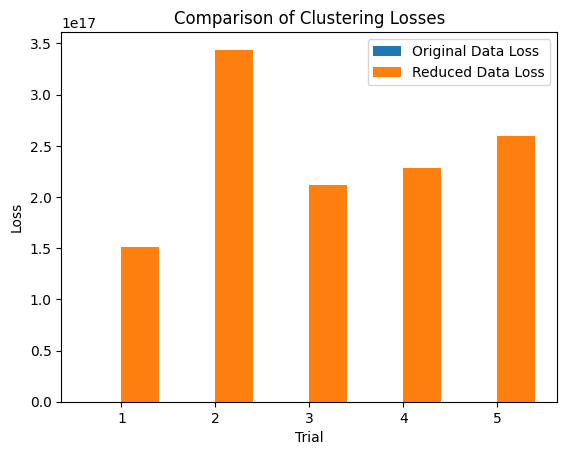

In [6]:
import numpy as np
from sklearn.datasets import fetch_kddcup99
from sklearn.cluster import KMeans
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd


data = fetch_kddcup99()
D = data.data
encoder = LabelEncoder()


df = pd.DataFrame(D)

categorical_features = [1, 2, 3]

for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])

D_encoded = df.to_numpy()

D = D_encoded
D = np.array(D, dtype=np.float64)

# print(D)

n, d = D.shape
print(n, d)

k = 15
reduced_dim = 20

def compute_loss(data, centroids):
    loss = 0
    for point in data:
        nearest_centroid = centroids[np.argmin(np.linalg.norm(point - centroids, axis=1))]
        loss += np.sum((point - nearest_centroid) ** 2)
    return loss

losses_original = []
losses_reduced = []

for trial in range(5):

    M = np.random.normal(loc=0.0, scale=1/np.sqrt(reduced_dim), size=(d, reduced_dim))
    E = np.dot(D, M)


    kmeans_reduced = KMeans(n_clusters=k, random_state=42).fit(E)
    A = kmeans_reduced.cluster_centers_
    A_projected = np.dot(A, np.linalg.pinv(M))
    
    kmeans_original = KMeans(n_clusters=k, random_state=42).fit(D)
    B = kmeans_original.cluster_centers_
    
    
    loss_reduced = compute_loss(D, A_projected)
    loss_original = compute_loss(D, B)
    
    losses_reduced.append(loss_reduced)
    losses_original.append(loss_original)


print(losses_original)
print(losses_reduced)

trials = range(1, 6)
plt.bar(trials, losses_original, width=0.4, label='Original Data Loss')
plt.bar([t + 0.4 for t in trials], losses_reduced, width=0.4, label='Reduced Data Loss')
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.xticks([t + 0.2 for t in trials], labels=trials)
plt.legend()
plt.title('Comparison of Clustering Losses')
plt.show()


2.304308364298335 0.8240358245982908
2.082211318971841 0.8240358245982908
9.904490943178338 0.8240358245982908
2.4742366105581355 0.8240358245982908
1.3267672272213626 0.8240358245982908
[0.8240358245982908, 0.8240358245982908, 0.8240358245982908, 0.8240358245982908, 0.8240358245982908]
[2.304308364298335, 2.082211318971841, 9.904490943178338, 2.4742366105581355, 1.3267672272213626]


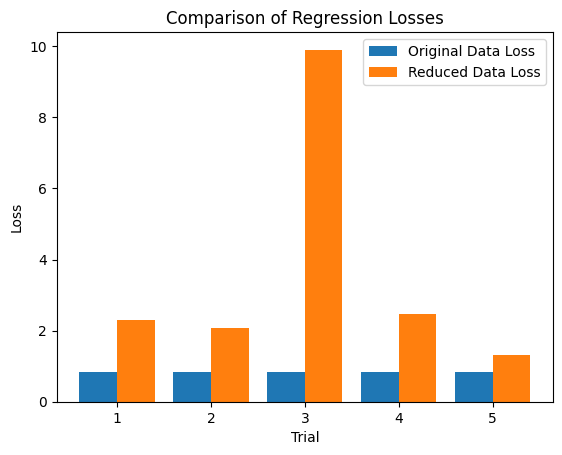

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_kddcup99
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.sparse import random as sparse_random
from sklearn.preprocessing import LabelEncoder


data = fetch_kddcup99()
D = data.data
encoder = LabelEncoder()


df = pd.DataFrame(D)

categorical_features = [1, 2, 3]

for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])

D_encoded = df.to_numpy()

D = D_encoded
D = np.array(D, dtype=np.float64)

y= data.target
y = encoder.fit_transform(y)
y = np.array(y, dtype=np.float64)

n, d = D.shape

def generate_sparse_jl_matrix(rows, cols, sparsity=0.1):
    return sparse_random(rows, cols, density=1/np.sqrt(cols), data_rvs=np.random.randn).toarray()

losses_original=[]
losses_reduced=[]

for _ in range(5):
    M = generate_sparse_jl_matrix(10*d, n)

    E = np.dot(M, D)
    z = np.dot(M, y) 

    reg_original = LinearRegression().fit(D, y)
    b = reg_original.coef_

    reg_jl = LinearRegression().fit(E, z)
    a = reg_jl.coef_

    loss_a = mean_squared_error(y, reg_jl.predict(D))
    loss_b = mean_squared_error(y, reg_original.predict(D))

    
    losses_reduced.append(loss_a)
    losses_original.append(loss_b)
    print(loss_a, loss_b)


print(losses_original)
print(losses_reduced)


import matplotlib.pyplot as plt

trials = range(1, 6)
plt.bar(trials, losses_original, width=0.4, label='Original Data Loss')
plt.bar([t + 0.4 for t in trials], losses_reduced, width=0.4, label='Reduced Data Loss')
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.xticks([t + 0.2 for t in trials], labels=trials)
plt.legend()
plt.title('Comparison of Regression Losses')
plt.show()
